# 📊 Minimizing Credit Risk: Automated Loan Eligibility Prediction
### A comparative analysis of classification algorithms to identify high-risk borrowers with precision

---

> *"Without data, you're just another person with an opinion."*  
> — **W. Edwards Deming**

---

## 1. 🌍 The Context

In the rapidly evolving landscape of **Housing Finance**, data has become the primary driver of strategic decision-making. Lenders specifically struggle with minimizing **Non-Performing Assets (NPAs)** while ensuring fair access to credit for qualified applicants.  

Traditional loan approval systems often rely on **manual underwriting**, which can be slow and prone to bias. As financial institutions process large volumes of applications, the ability to **instantly and accurately** assess a borrower’s solvency—distinguishing between *eligibility* and *affordability*—is essential for maintaining a healthy credit portfolio.

This project explores the **Loan Prediction Dataset** to uncover hidden patterns and provide **actionable intelligence**. By leveraging historical data, we aim to move from *reactive manual reviews* to *proactive predictive solutions*.

---

## 2. ❓ The Challenge

The core problem addressed in this analysis is **the inefficiency in identifying high-risk applicants manually**. Currently, the absence of automated predictive insights leads to:

* **💸 Revenue Loss:** Loan defaults (NPAs) directly impact profitability.
* **⚙ Operational Inefficiency:** Underwriters spend time manually rejecting obvious cases (e.g., Credit History = 0.0).
* **🚪 Missed Opportunities:** Without distinguishing *eligibility* (approval) from *affordability* (loan size), banks may reject financially stable applicants who simply requested too much.

---

## 3. 💡 The Data Science Approach

This project follows a structured **Data Science lifecycle**, rooted in insights discovered during EDA:

### 🔍 **1. Data Ingestion & Cleaning**
- Handled missing values using:  
  - **Mode imputation** for categorical features  
  - **Median imputation** for numerical features  
- Converted object columns to `category` dtype for efficiency

### 📊 **2. Exploratory Data Analysis (EDA)**
- Identified a **Standard Product** (360-month term)
- Discovered the **Typical Persona**: Salary-based, Graduate, 0 Dependents
- Observed Credit History as the strongest variable for Loan Approval

### 🧠 **3. Feature Engineering**
- Created **`Total_Income = Applicant + Coapplicant`** →  tried to resolves the “Co-applicant Paradox”
- `Total_Income` is not a discriminator for loan approval; wealthy and modest applicants face the same rejection rate if other factors (like `Credit_History`) are missing. Income determines how much you can borrow, **not if you can borrow**
- Applied **Log Transformation** to fix right-skewed income & loan distributions
- Used **One-Hot Encoding** for demographic variables

### 🤖 **4. Model Development**
- Trained classifiers including:  
  **Logistic Regression, Decision Tree, Random Forest**  
- Optimized using **Accuracy & Recall** to minimize false negatives (risk cases)

---

## 4. 🚀 Impact & Objectives

The objective is not just to build a model — but to **enable smarter decisioning** through a **Two-Stage Decision Framework**:

| **Decision Stage** | **Primary Driver** | **Insight** |
|-------------------|-------------------|-------------|
| **Approval (Eligibility)** | Credit History | Works as a strict **Pass/Fail Gatekeeper** |
| **Loan Size (Affordability)** | Income & Education | Drives ambition & borrowing power |

**🎯 Business Goal:** Achieve **>80% Accuracy** in predicting `Loan_Status`  
**🧠 Scalability:** Automatically filter high-risk applicants (`Credit_History = 0.0`) *before* expensive manual underwriting starts

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from utils.helper import summarize_dataframe

In [33]:
df = pd.read_csv(r"..\data\Loan.csv")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [35]:
# Renaming columns for better understanding

columns_name = {'ApplicantIncome' : "Applicant_Income",
                'CoapplicantIncome' : "Coapplicant_Income",
                'LoanAmount' : "Loan_Amount",
                }

df.rename(columns = columns_name, inplace = True)

In [36]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [37]:
summarize_dataframe(df)

----------------------------------------------------------------------------------------------------
There are 614 rows with 13 columns in the DataFrame.
----------------------------------------------------------------------------------------------------


,columns,total_counts,unique_counts,null_counts
0,Loan_ID,614,614,0
1,Gender,601,2,13
2,Married,611,2,3
3,Dependents,599,4,15
4,Education,614,2,0
5,Self_Employed,582,2,32
6,Applicant_Income,614,505,0
7,Coapplicant_Income,614,287,0
8,Loan_Amount,592,203,22
9,Loan_Amount_Term,600,10,14


> There are total 614 rows in df  
> The columns are `Loan_ID`, `Gender`, `Married`, `Dependents`, `Education`, `Self_Employed`, `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`, `Credit_History`, `Property_Area`, `Loan_Status`  
> The Dataframe contains null data points in it    
> Most of the columns have cateforical values which we need to convert to `category` dtype  
> 

In [38]:
print(f'There are {df.duplicated().sum()} entries in the Dataframe!')

There are 0 entries in the Dataframe!


In [39]:
def obj_to_cat(df: pd.DataFrame, cols: list):
    for col in cols:
        df[col] = df[col].astype('category')
    
    return df.info()

obj_to_cat(df, ['Gender', 'Married', 'Dependents', 'Education', 
                'Self_Employed', 'Credit_History','Property_Area', 
                'Loan_Status'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Loan_ID             614 non-null    object  
 1   Gender              601 non-null    category
 2   Married             611 non-null    category
 3   Dependents          599 non-null    category
 4   Education           614 non-null    category
 5   Self_Employed       582 non-null    category
 6   Applicant_Income    614 non-null    int64   
 7   Coapplicant_Income  614 non-null    float64 
 8   Loan_Amount         592 non-null    float64 
 9   Loan_Amount_Term    600 non-null    float64 
 10  Credit_History      564 non-null    category
 11  Property_Area       614 non-null    category
 12  Loan_Status         614 non-null    category
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 30.0+ KB


# EDA
---
## 1. Univariate Analysis

In [40]:
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')


In [41]:
# As we have change the DataTypes, we will redefine numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

In [42]:
df.describe().T.style.background_gradient(cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
Applicant_Income,614.000000,5403.459283,6109.041673,150.000000,2877.500000,3812.500000,5795.000000,81000.000000
Coapplicant_Income,614.000000,1621.245798,2926.248369,0.000000,0.000000,1188.500000,2297.250000,41667.000000
Loan_Amount,592.000000,146.412162,85.587325,9.000000,100.000000,128.000000,168.000000,700.000000
Loan_Amount_Term,600.000000,342.000000,65.120410,12.000000,360.000000,360.000000,360.000000,480.000000


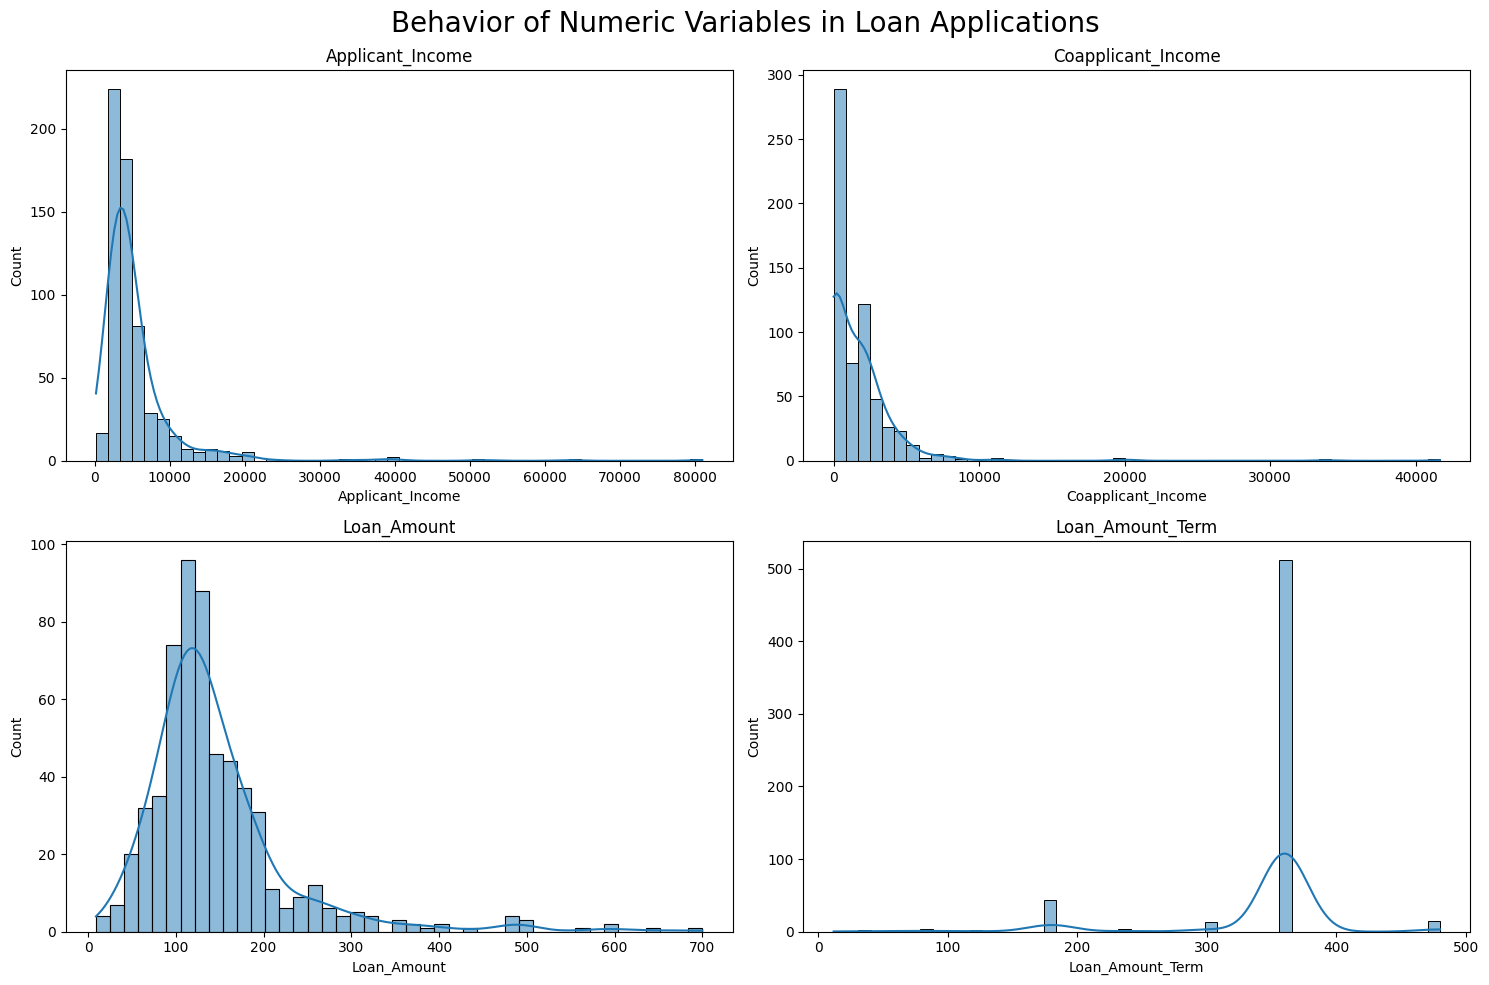

In [43]:
n_cols = 2  # number of columns you want
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # auto-calculate rows

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.suptitle('Behavior of Numeric Variables in Loan Applications', fontsize=20)
plt.tight_layout()
plt.show()

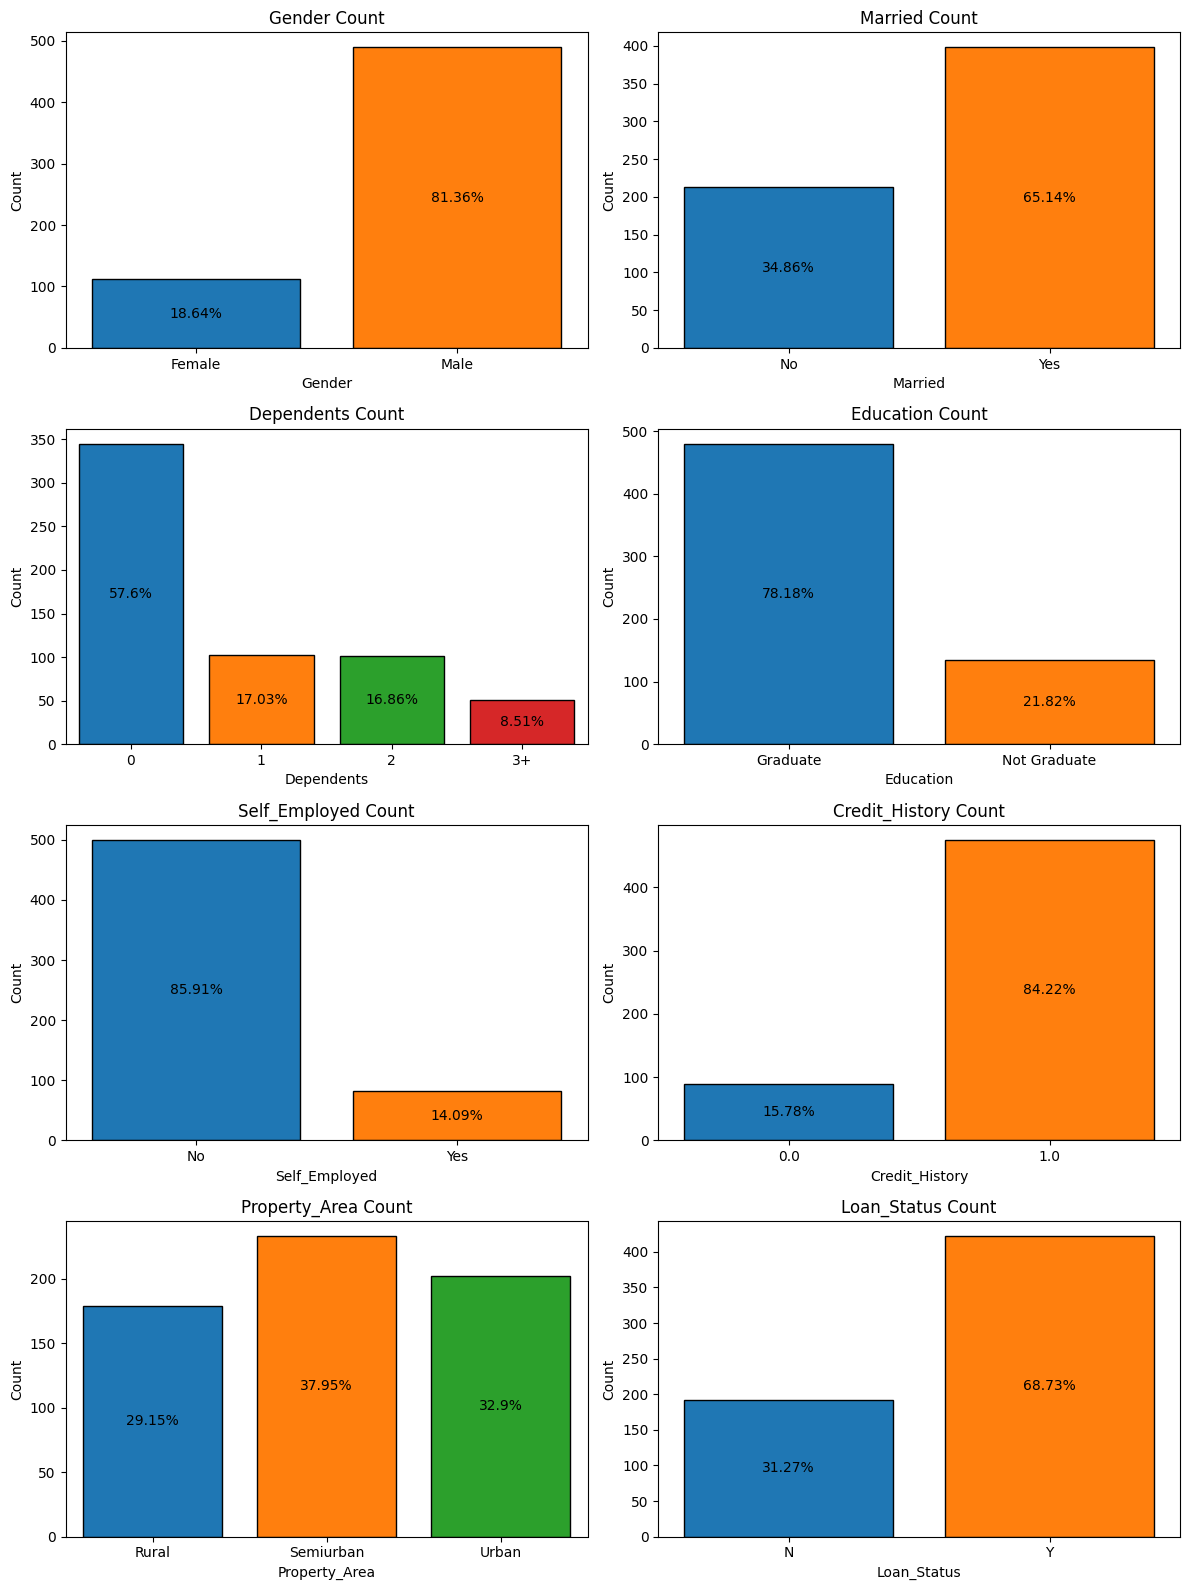

In [44]:
# 1. Filter the columns first so we don't have gaps or index errors
cols_to_plot = [col for col in categorical_cols if col != 'Loan_ID']

# 2. Calculate rows dynamically without math lib (Ceiling division formula)
n_cols = 2
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

# 3. Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 4 * (n_rows)))
axes = axes.flatten()

# 4. Loop through the filtered list
for i, col in enumerate(cols_to_plot):
    ax = sns.countplot(data=df, x=col, ax=axes[i], edgecolor='black')

    # Assign colors
    for j, bar in enumerate(ax.patches):
        bar.set_facecolor(plt.cm.tab10(j % 10))  # % 10 prevents errors if >10 categories

    # ➤ Add percentages on bars
    total = df[col].value_counts().sum()
    for cat, val in df[col].value_counts().items():
        per = round((val / total) * 100, 2)
        ax.text(cat, val * 0.5, f'{per}%', ha='center', va='center', fontsize=10)  # USE ax.text

    # Titles and labels
    axes[i].set_title(f'{col} Count')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# 5. Remove unused axes
for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

# plt.savefig(r'..\plots\2.univariate_cat_cols.png')
plt.tight_layout()
plt.show()


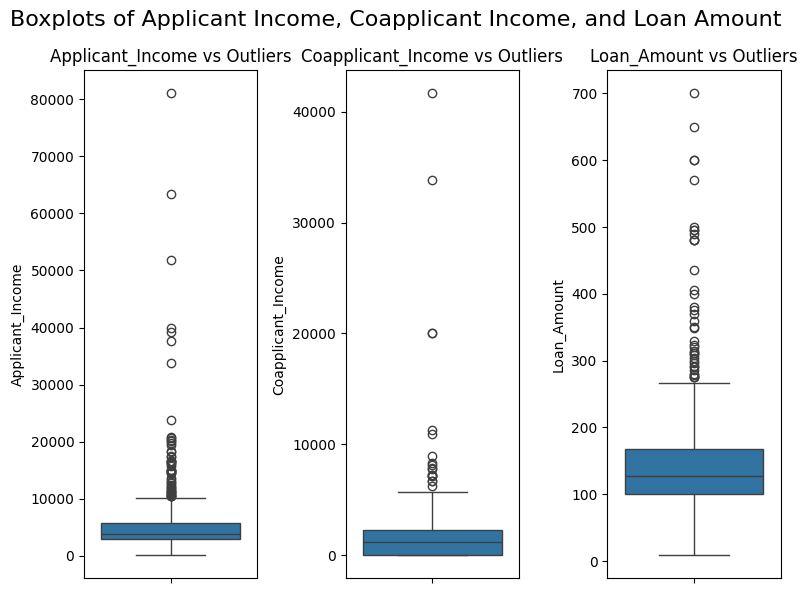

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 6))

# Boxplot 1 (Seaborn)
sns.boxplot(y=df['Applicant_Income'], ax=axes[0])
axes[0].set_title('Applicant_Income vs Outliers')
axes[0].set_xlabel('')
axes[0].set_ylabel('Applicant_Income')

# Boxplot 2 (Seaborn)
sns.boxplot(y=df['Coapplicant_Income'], ax=axes[1])
axes[1].set_title('Coapplicant_Income vs Outliers')
axes[1].set_xlabel('')
axes[1].set_ylabel('Coapplicant_Income')

# Boxplot 3 (Seaborn)
sns.boxplot(y=df['Loan_Amount'], ax=axes[2])
axes[2].set_title('Loan_Amount vs Outliers')
axes[2].set_xlabel('')
axes[2].set_ylabel('Loan_Amount')

plt.suptitle('Boxplots of Applicant Income, Coapplicant Income, and Loan Amount', fontsize=16)
# plt.savefig(r'..\plots\3.Outliers_boxplots.png')
plt.tight_layout()
plt.show()


# **Univariate Analysis**

---

## **1. The "Typical" Applicant Profile**

Our historical data indicates that the standard loan applicant is a **financially stable, salaried professional**.

### **Demographics**
- Predominantly **male (81%)**
- **Married (65%)**
- **Graduate-level education (78%)**

### **Employment**
- Contrary to assumptions that entrepreneurs seek the most funding, **86% of applicants are *not* self-employed**, indicating that:
  - Our primary market is **salaried individuals**
  - Use-case likely focused on **housing finance**

### **Family Structure**
- **58% have zero dependents**, indicating:
  - Early-career applicants **or**
  - Empty-nesters with **lower household overhead**

---

## **2. Financial Health & Creditworthiness**

### **Credit History**
- **84%** of applicants have a **credit history of 1.0**, meeting guidelines — the **strongest approval indicator**.

### **Income Distribution**
- Median applicant income: **~$3,800**
- Highly **right-skewed** by high-net-worth outliers (**some earning > $80k**)

### **Co-Applicants**
- A significant number of applications report **zero co-applicant income**, suggesting **single-income loan requests**.

---

## **3. Product Fit**

### **Loan Preferences**
- Strong preference for **long-term security**:
  - Majority opt for **360-month (30-year)** repayment terms
  - Typical loan amounts fall between **100K–150K**

### **Geography**
- Balanced distribution:
  - **Semiurban: 38%**
  - **Urban: 33%**
  - **Rural: 29%**
- Slight tilt toward **semiurban housing markets**

---

**Overall Insight:**  
Our core customer base consists of **financially responsible salaried individuals**, often early in their careers, seeking **long-term housing loans** with strong credit profiles and minimal financial dependents.


# Bivariate Analysis

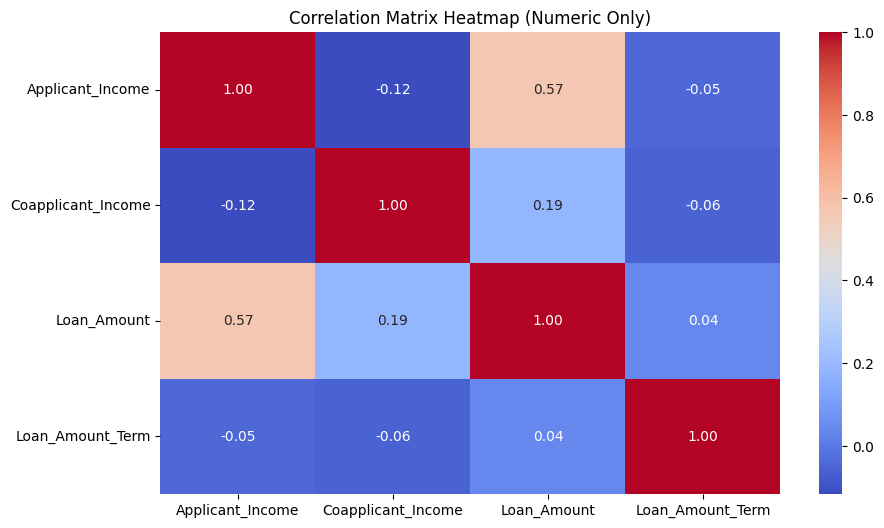

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap (Numeric Only)")
plt.show()
# plt.savefig(r'..\plots\4.Bivariate_correlation.png')

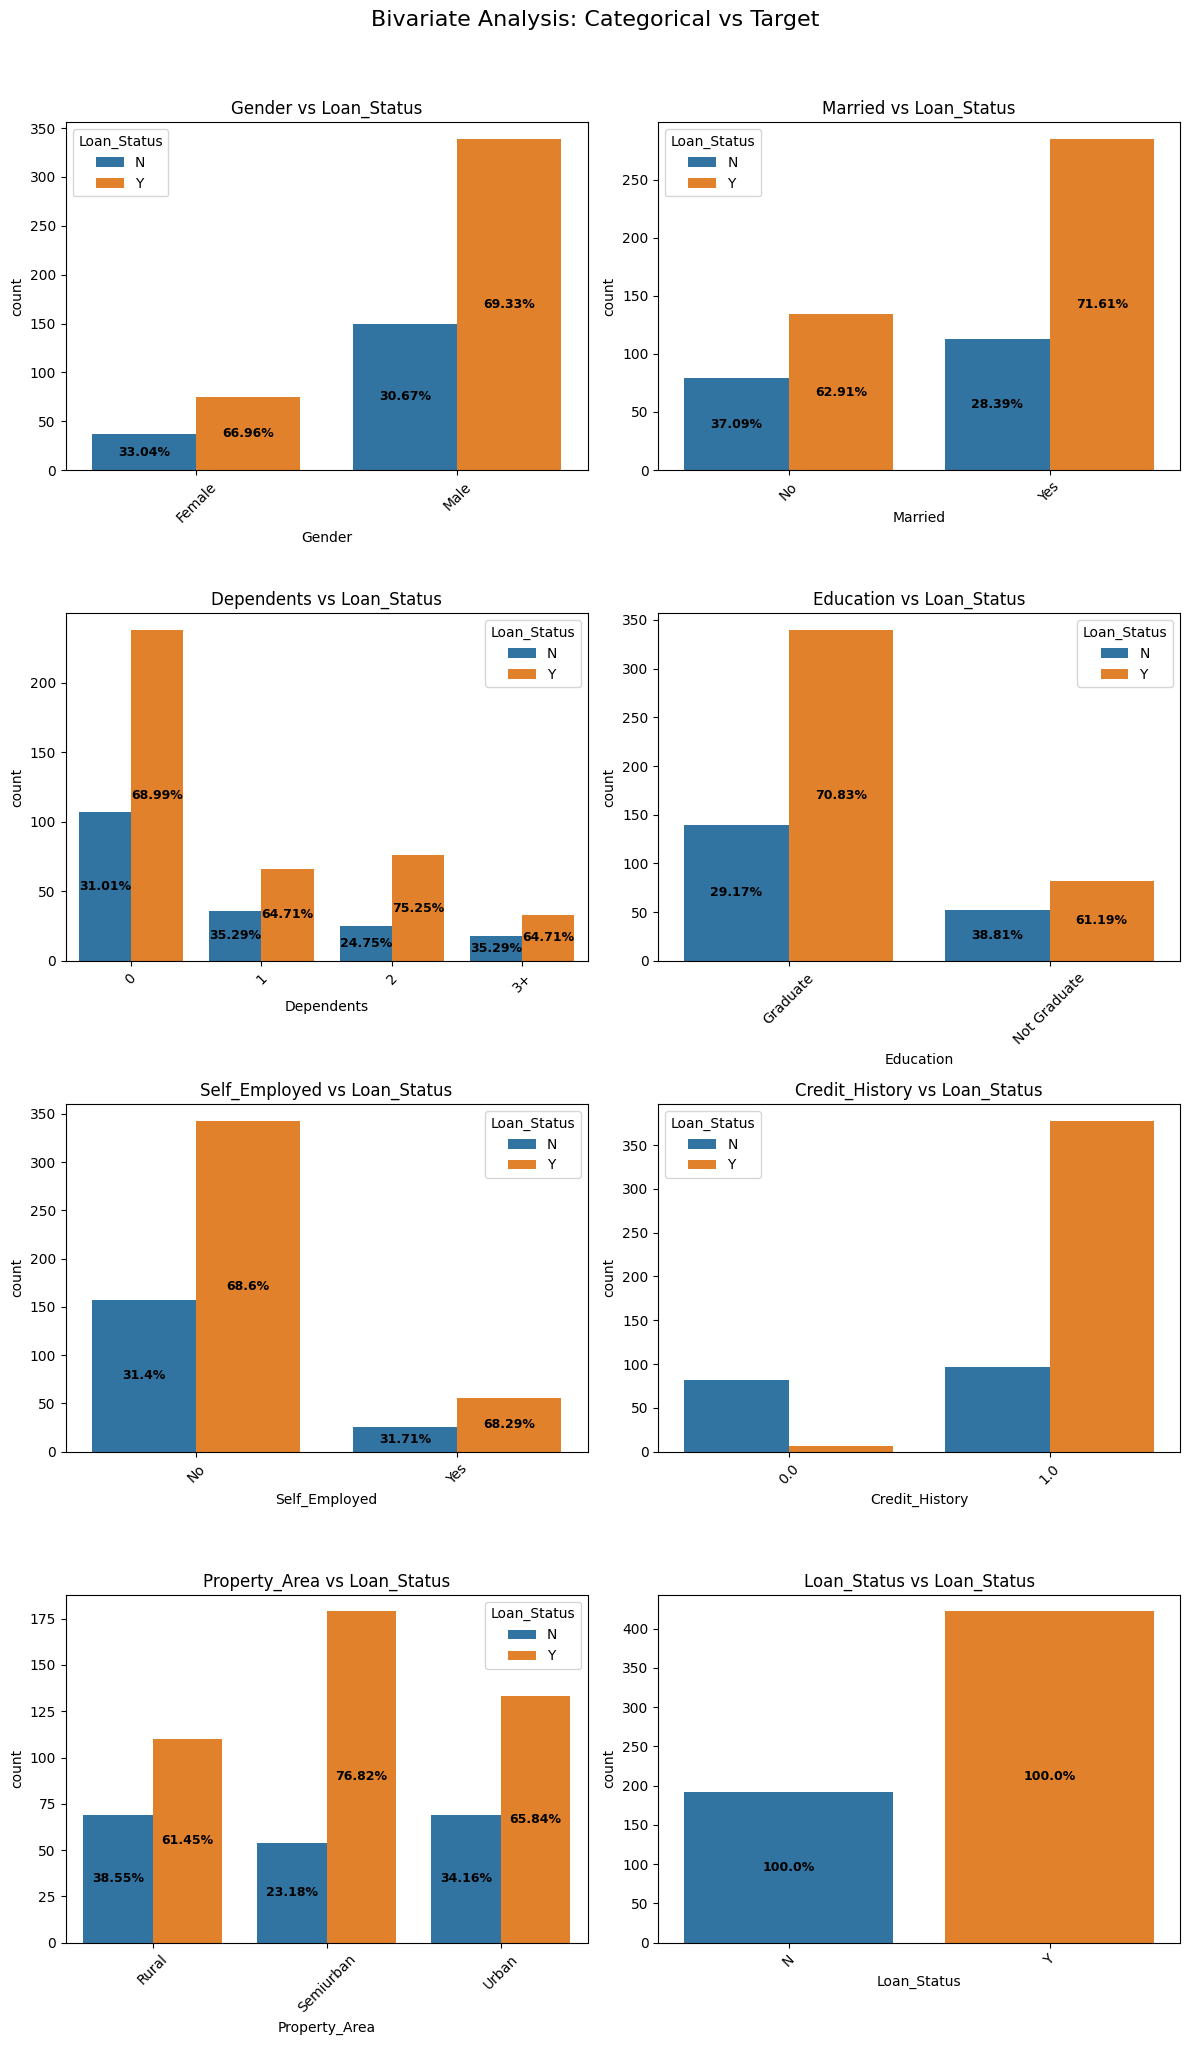

In [47]:
not_loan_id = [col for col in categorical_cols if col != 'Loan_ID']
n_cols = 2
n_rows = (len(not_loan_id) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

for ax, col in zip(axes, not_loan_id):
    sns.countplot(x=col, hue='Loan_Status', data=df, ax=ax)
    ax.set_title(f'{col} vs Loan_Status')
    ax.tick_params(axis='x', rotation=45)
    
    total_counts = df[col].value_counts()
    categories = [tick.get_text() for tick in ax.get_xticklabels()]
    
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            x = p.get_x() + p.get_width() / 2
            cat_idx = int(round(x))
            if 0 <= cat_idx < len(categories) and categories[cat_idx] in total_counts.index:
                percent = round((height / total_counts[categories[cat_idx]]) * 100, 2)
                ax.text(x, height * 0.5, f'{percent}%', ha='center', va='center', fontsize=9, fontweight='bold')

for ax in axes[len(not_loan_id):]:
    ax.remove()

plt.suptitle('Bivariate Analysis: Categorical vs Target', fontsize=16, y=1.02)
plt.tight_layout()
# plt.savefig(r'..\plots\8.Bivariate_categorical_vs_target.png') 
plt.show()

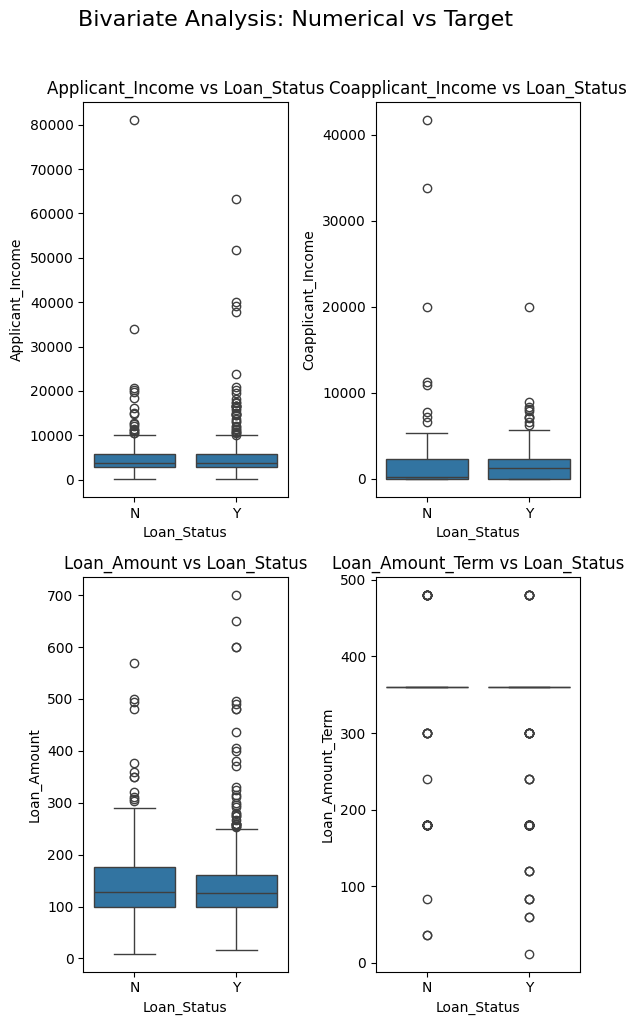

In [48]:
# Remove Loan_ID if present
not_loan_id = [col for col in numeric_cols if col != 'Loan_ID']

# Symmetric layout
n_cols = 2
n_rows = (len(not_loan_id) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6, 5 * n_rows))
axes = axes.flatten()

for ax, col in zip(axes, not_loan_id):
    sns.boxplot(x='Loan_Status', y=col, data=df, ax=ax)  # boxplot → numeric vs target
    ax.set_title(f'{col} vs Loan_Status')
    ax.set_xlabel('Loan_Status')
    ax.set_ylabel(col)

# Remove extra empty axes
for ax in axes[len(not_loan_id):]:
    ax.remove()

plt.suptitle('Bivariate Analysis: Numerical vs Target', fontsize=16, y=1.02)
# plt.savefig(r'..\plots\8.Bivariate_numerical_vs_target.png') 
plt.tight_layout()
plt.show()


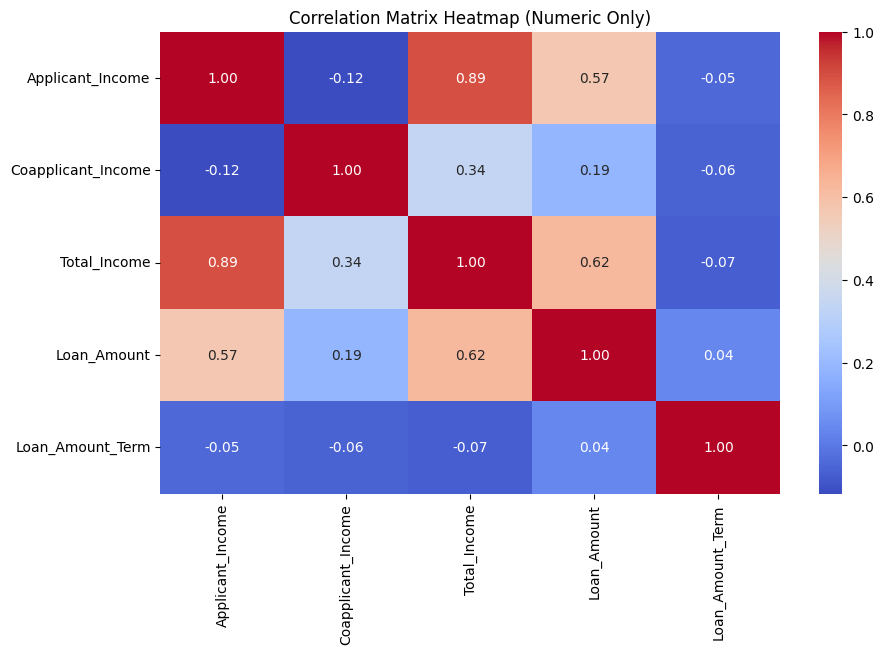

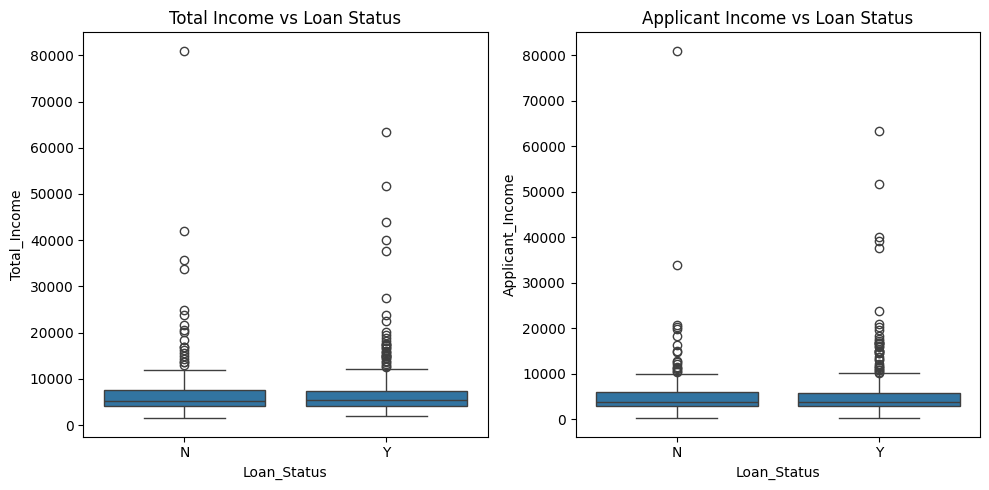

In [69]:
df['Total_Income'] = df['Applicant_Income'] + df['Coapplicant_Income']
df = df[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income', 'Total_Income', 
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status']]

numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap (Numeric Only)")
plt.show()
# plt.savefig(r'..\plots\4.Bivariate_correlation.png')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1 – Total Income vs Loan Status
sns.boxplot(x='Loan_Status', y='Total_Income', data=df, ax=axes[0])
axes[0].set_title('Total Income vs Loan Status')

# Plot 2 – Applicant Income vs Loan Status
sns.boxplot(x='Loan_Status', y='Applicant_Income', data=df, ax=axes[1])
axes[1].set_title('Applicant Income vs Loan Status')

plt.tight_layout()
plt.show()


In [65]:
df = df.drop(columns=['Total_Income'])

numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

## 🧾 **Key Insights from Bivariate Analysis**

Our analysis reveals that **Credit History** is the primary *“gatekeeper”* for loan approval, while **Income** acts as a determinant for the *loan size* rather than approval probability.

---

### 📊 **Key Drivers of Loan Approval — Categorical Insights**

#### 🟢 **The "Golden" Profile**
Applicants who are **Married**, **Graduates**, and residing in **Semiurban** areas show **70%+ approval rates**, significantly higher than other groups.
#### 🔑 **The Non-Negotiable**
**Credit History** is the strongest differentiator:
- `1.0` → **~80% approval**
- `0.0` → **almost guaranteed rejection**
#### ⚖ **Demographic Neutrality**
- **Gender**
- **Self-Employment Status**

These variables show **minimal impact** on approval probability, indicating the bank’s decision-making is **fair & unbiased** regarding these factors.

---

### 📈 **Financial Behaviors — Numerical Insights**

---

#### 🧮 **Income vs Loan Size**
- Correlation between **Applicant_Income** and **Loan_Amount**: **0.57**
- 👉 Higher income **does not guarantee approval**,  
  but it **increases the loan amount sanctioned**.

---

#### ❗ **The Co-Applicant Paradox**
- Higher **Co-Applicant Income** seems correlated with **loan rejection**.
- Likely explains that co-applicants are often added to **support weaker financial profiles** rather than strong ones.
- This confirms that Feature Engineering will be critical here. Creating a `Total_Income` feature (`Applicant` + `Coapplicant`) will likely flip this relationship to positive and reveal the true predictive power.
- Even after combining incomes (`Applicant + Coapplicant`), **Total_Income does not improve loan approval prediction**.  
- Wealthy and modest applicants face similar rejection rates when **Credit History is missing**.  
- 👉 Income determines **how much** you can borrow — **not if** you can borrow.

---

#### 📆 **Loan Structure Insight**
- Most approved loans follow a **360-month (30-year) term**.
- Indicates a **standardized long-term loan product** preference by the bank.

---

### 🧠 **Final Summary**

| Factor | Impact on Approval | Impact on Loan Size |
|-------|---------------------|----------------------|
| Credit History | ⭐ Very High | Moderate |
| Applicant Income | Low | 🟢 Strong |
| Coapplicant Income | Paradoxical | Weak |
| Education (Graduate) | Moderate | Low |
| Location (Semiurban) | Moderate | Low |
| Loan Term (360 Months) | Standard | Standard |

---

# Multivariate Analysis
---

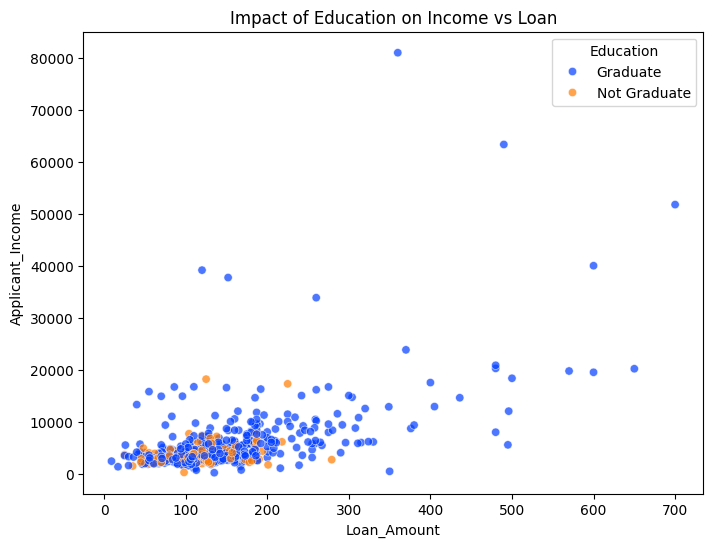

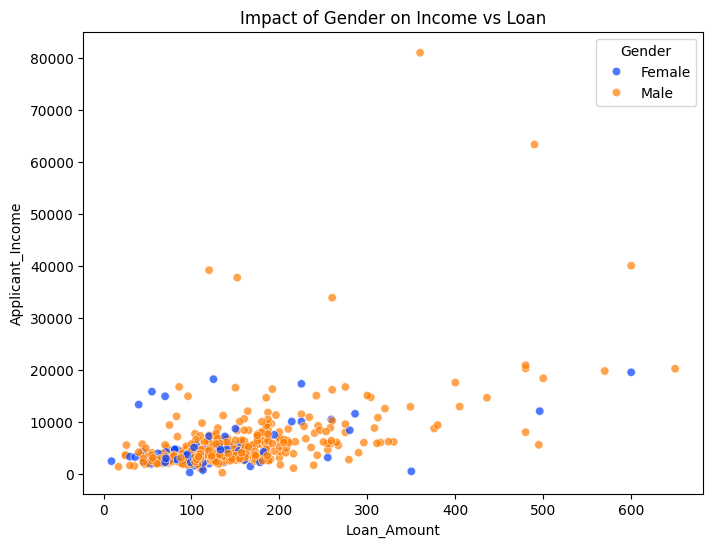

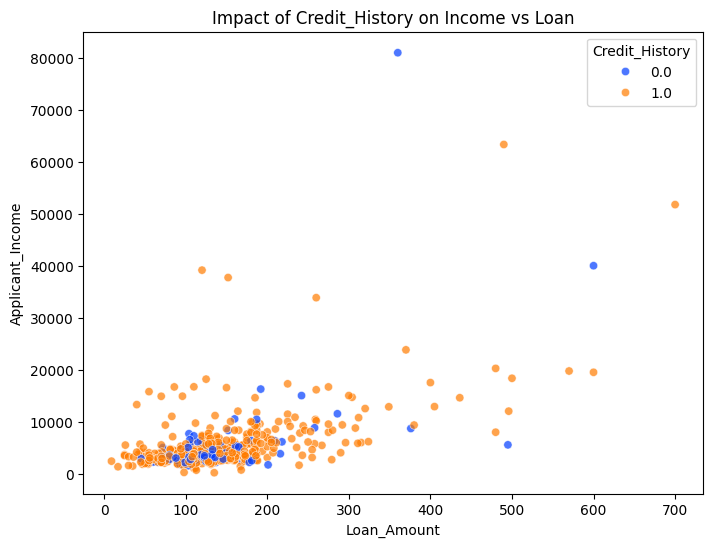

In [49]:
important_vars = ['Education', 'Gender', 'Credit_History']

# Loop to create 3 individual, high-quality plots
for var in important_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df,
        x='Loan_Amount',
        y='Applicant_Income',
        hue=var,           # The variable highlights the pattern
        alpha=0.7,         # Slight transparency to see overlapping dots
        palette='bright'   # High contrast colors
    )
    plt.title(f'Impact of {var} on Income vs Loan')
    plt.show()

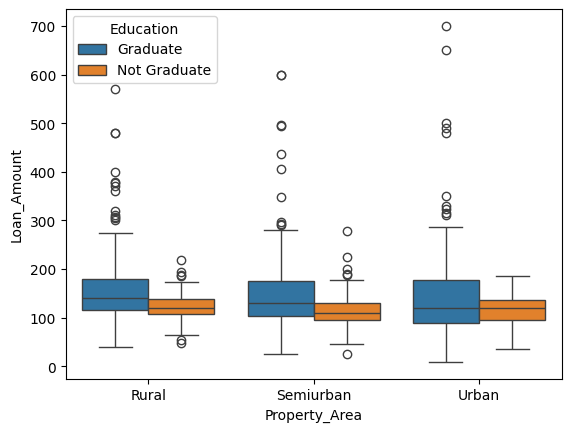

In [50]:
sns.boxplot(x='Property_Area', hue='Education', y='Loan_Amount', data=df)
plt.show()

### 🔍 **Multivariate Insights – Key Findings**

---

## 📌 1. **The "Education Premium" on Loan Size**

**Graduates**
- Show a strong positive correlation between **Income** and **Loan Amount**.
- Their financial profile is **elastic** — as income increases, loan requests scale linearly.
- Loan sizes can reach **$600k+**, indicating higher borrowing confidence and eligibility.

**Non-Graduates**
- Face a **financial ceiling**.
- Regardless of location, most loan requests fall tightly between **$100k – $130k**.
- Suggests limited borrowing power or standardized loan offerings for this segment.

---

## 🌍 2. **Geographic Impact (Property Area)**

**Urban Aggressiveness**
- Urban Graduates show both **highest variance** and **highest average loan requests**.
- Likely driven by **higher property valuations** in urban regions.

**Rural Consistency**
- Rural Graduates still request **significantly higher loans** than Rural Non-Graduates.
- 👉 Suggests **Education has more influence than Location** on borrowing appetite.

---

## 🧾 3. **The Role of Credit History**

**A Filter, Not a Factor**
- Credit History (1.0 vs 0.0) shows **no clear pattern** with Income or Loan Amount.
- Applicants with poor credit histories **still apply for large loans**, similar to those with good credit.
- Therefore:
  > **Credit History should be used as a strict PASS/FAIL filter early**,  
  > **not as a variable for determining loan size**.  

## 📌 4. Total_Income Analysis – Purpose Found  
- Total Income helps understand **affordability**, but **not eligibility**. Even high-income applicants get rejected if Credit_History is poor.  
- 💡 This confirms our finding: *Income scales borrowing capacity, but approval depends on Credit History.*


---

### ✅ **Conclusion**
Education drives how much applicants **want** to borrow.  
Location influences what they **need** to borrow.  
Credit history decides **whether they even get a chance** to borrow.

--- 

---
## 🧠 **Final Business Insights**

---

### 🔷 1. **The Customer Persona: "Stable & Salaried"**

Our analysis confirms that the core customer base is **financially stable, educated, and professional**.

**Key Traits:**
- **Demographics:** Mostly **Male**, **Married**, and **Graduate**-level education.
- **Household Structure:** **58% have Zero Dependents** → suggests early-career professionals or empty-nesters with fewer financial burdens.
- **Employment:** **86% are salaried** (not self-employed) → stable income sources.
- **Income Reality:**  
  - **Median income ≈ $3,800**  
  - **Mean income is inflated due to outliers** (> $80k), showing income distribution skew.

---

### 🔶 2. **The Two-Stage Decision Framework**

The data clearly separates **approval** from **loan size determination**.

| **Stage** | **Primary Driver** | **Insight** |
|-----------|--------------------|-------------|
| **Stage 1: Approval** | Credit History | Acts as the **Gatekeeper**. A score of `1.0` is the strongest & non-negotiable approval factor. |
| **Stage 2: Loan Value** | Income & Education | Once approved:  
  - **Education** drives loan *ambition* (higher elasticity).  
  - **Location** influences the *base property cost*. |

---

✔ Additional Insight:  
- `Total_Income` confirms the **two-stage decision logic** —  
  - it helps size the loan (affordability),  
  - but **cannot override Credit History** for approval.  
- This makes Credit History the **true gatekeeper** variable.  

---

### 🧾 3. **Product Alignment**

- **The 30-Year Standard:**  
  Most approved loans are structured for **360 months (30 years)** → consistent with **long-term mortgages**, not short-term personal loans.

- **The Co-Applicant Paradox:**  
  Co-applicant income shows **negative correlation with approval** → implies co-applicants are often added to **support weaker primary applicants**, rather than increasing approval chances.

---

### 🧩 **Overall Conclusion**

✔ The customer base is **stable, salaried, and risk-mitigated**.  
✔ Loan approval is a **binary gate** – driven by **Credit History**.  
✔ Loan size is an **elastic decision** – driven by **Income + Education + Location**.  
✔ The product aligns with a **predictable mortgage model**.  
